**Problem Statement:**

How can we effectively leverage machine learning techniques to analyze historical equipment data, sensor readings, and operational conditions to predict potential failures accurately and in advance, thereby optimizing maintenance schedules, minimizing equipment downtime, and maximizing overall system reliability?

In [1]:
#Importing neccessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Linking the dataset with google collab

df = pd.read_csv('/content/drive/MyDrive/ML and DL DataSets/Machine Learning/Predictive_Maintenance.csv')
print(df)

        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0    

#Data Processing

In [4]:
#Viewing the first five rows of the dataset
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [7]:
#To check if the dataset has any missing value
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

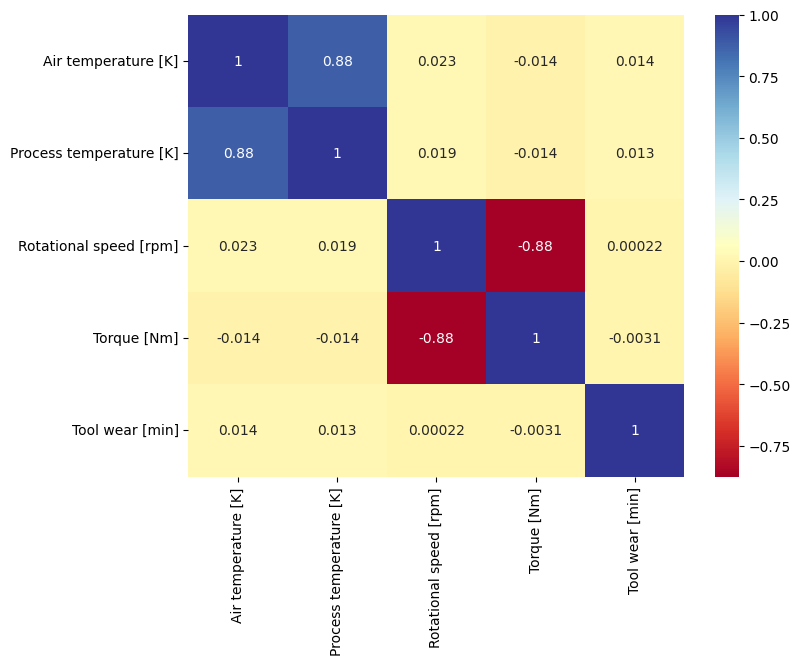

In [8]:
# Dropping id and string columns to check correlation
co_coeff = df.drop(['Product ID',"UDI","Target","Type","Failure Type"], axis=1)

# Plotting Correlation coefficient
plt.figure(figsize=(8,6))
sns.heatmap(co_coeff.corr(),annot = True,cmap = "RdYlBu")
plt.draw()

# Data Visualization

In [9]:
# Removing id columns
df.drop(['Product ID',"UDI"], axis=1, inplace=True)

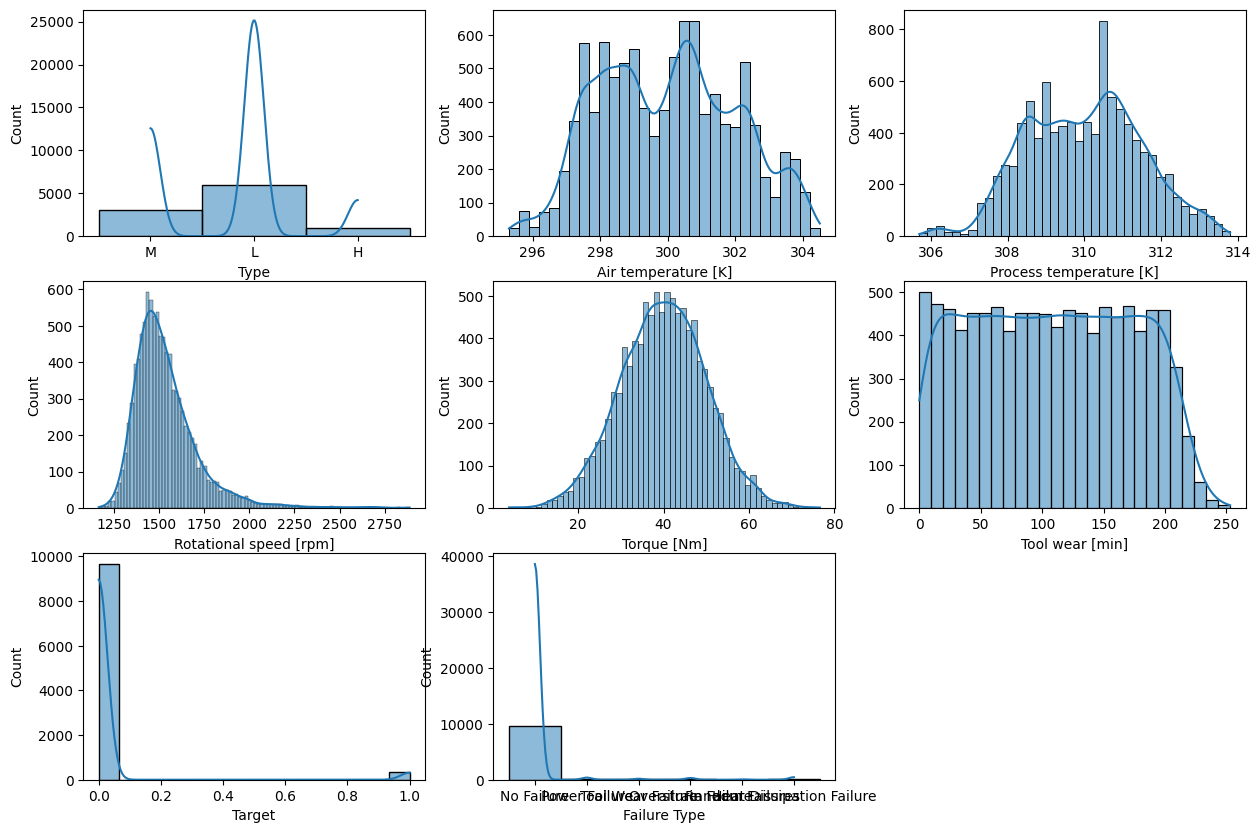

In [10]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

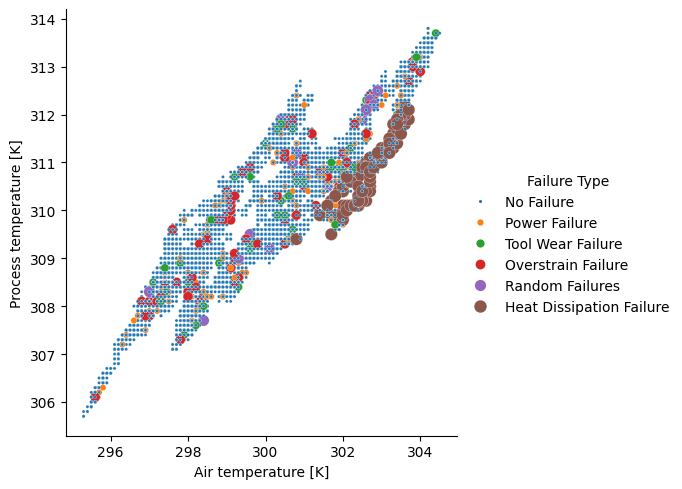

In [11]:
# Getting relation between Air temperature [K] and Process temperature [K]
_ = sns.relplot(x="Air temperature [K]",
                y="Process temperature [K]",
                hue="Failure Type",
                size="Failure Type",
                sizes=(80, 5),
                data=df)

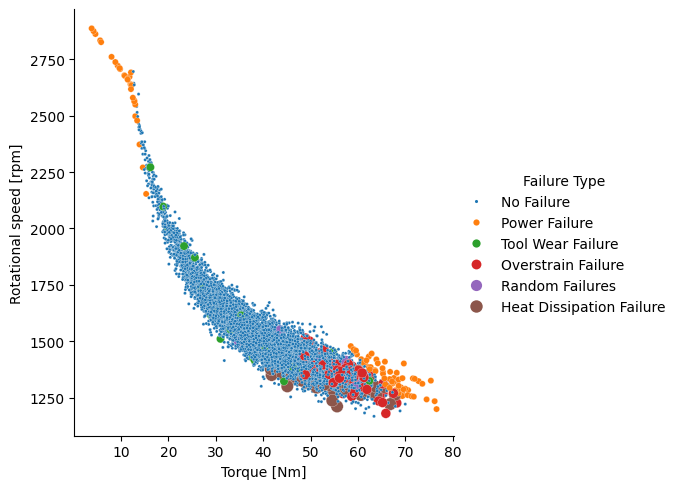

In [12]:
# Getting relation between Torque [Nm] and Rotational speed [rpm]
_ = sns.relplot(x="Torque [Nm]",
                y="Rotational speed [rpm]",
                hue="Failure Type",
                size="Failure Type",
                sizes=(80, 5),
                data=df)

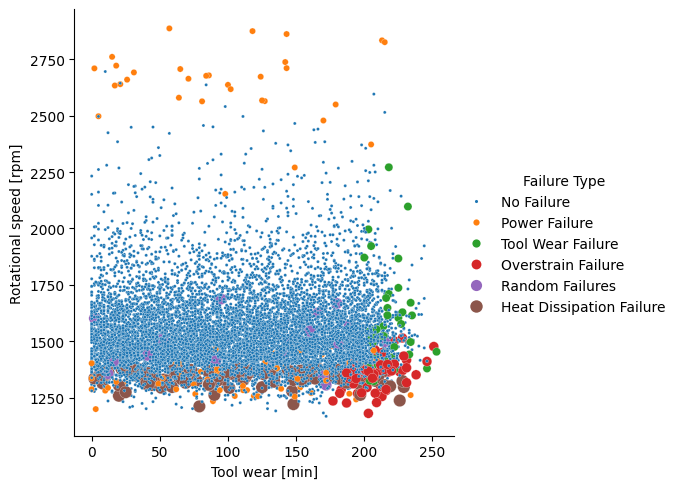

In [13]:
# Getting relation between Tool wear [min] and Rotational speed [rpm]
_ = sns.relplot(x="Tool wear [min]",
                y="Rotational speed [rpm]",
                hue="Failure Type",
                size="Failure Type",
                sizes=(80, 5),
                data=df)

# Getting categorical value

In [14]:
df["Failure Type"].replace({"No Failure": 0,"Heat Dissipation Failure": 1,"Power Failure": 2,"Overstrain Failure": 3,"Tool Wear Failure": 4,"Random Failures": 5},inplace=True)

In [15]:
df["Type"].replace({"H":0,"L":1,"M":2}, inplace=True)

In [16]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0
2,1,298.1,308.5,1498,49.4,5,0,0
3,1,298.2,308.6,1433,39.5,7,0,0
4,1,298.2,308.7,1408,40.0,9,0,0
...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,0
9996,0,298.9,308.4,1632,31.8,17,0,0
9997,2,299.0,308.6,1645,33.4,22,0,0
9998,0,299.0,308.7,1408,48.5,25,0,0


# Train-Test Split

In [17]:
# Creating Feature columns and Output columns
X = df.iloc[:, :6]
y = df["Failure Type"]

In [18]:
# Splitting with StratifiedKFold for Cross-Validation

from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=None) # Create a StratifiedKFold Object

for train_index,test_index in skf.split(X,y): # Iterate Through Folds

    x1_train,x1_test=X.iloc[train_index],X.iloc[test_index] # Split Data into Training and Test Sets
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]

    train_0, train_1 = len(y1_train[y1_train==0]), len(y1_train[y1_train==1]) # Count Samples per Class
    test_0, test_1 = len(y1_test[y1_test==0]), len(y1_test[y1_test==1])

    print('train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1)) # Print Class Distribution

# We can see the data is too much imbalanced

train: 0=7721, 1=90, Test: 0=1931, 1=22
train: 0=7721, 1=90, Test: 0=1931, 1=22
train: 0=7722, 1=90, Test: 0=1930, 1=22
train: 0=7722, 1=89, Test: 0=1930, 1=23
train: 0=7722, 1=89, Test: 0=1930, 1=23


In [19]:
# Splitting the X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=0.30, stratify=y)

In [20]:
# Checking the number of datapoints

print(X_train.shape)
print(y_test.shape)

(7000, 6)
(3000,)


# Synthetic Minority Over-sampling Technique

In [21]:
# Implementing Synthetic Minority Over-sampling Technique for oversamples the minority class
from imblearn.combine import SMOTETomek

smote = SMOTETomek(random_state=42)
X1_res, y1_res = smote.fit_resample(X_train,y_train) # Not taking the output variable

In [22]:
X1_res

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,300.200000,309.400000,1526,35.300000,46
1,1,298.300000,309.400000,1618,31.500000,108
2,1,297.600000,309.000000,1491,43.200000,7
3,1,299.600000,311.100000,1679,30.700000,129
4,1,300.000000,309.300000,1558,29.700000,168
...,...,...,...,...,...,...
40471,1,302.600000,312.100000,1616,30.628737,190
40472,1,301.856867,311.455951,1643,30.384435,182
40473,0,301.023550,310.000410,1634,30.532219,37
40474,0,298.643505,307.949039,1619,31.398847,159


In [23]:
y1_res.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Failure Type, dtype: int64

In [24]:
df_SMOT = pd.concat([X1_res,y1_res], axis=1)

In [25]:
df_SMOT['Failure Type'].value_counts() # Now all the Failure Type has equal values

Failure Type
3    6755
2    6754
1    6750
4    6749
5    6742
0    6726
Name: count, dtype: int64

# Data Analysis on SMOTET dataset

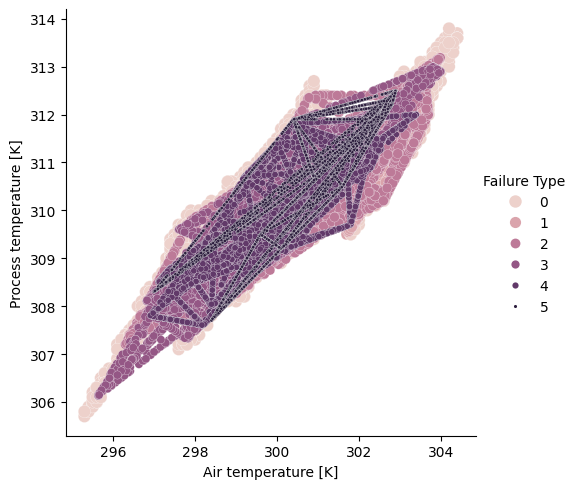

In [26]:
# Getting relation between Air temperature [K] and Process temperature [K]
_ = sns.relplot(x="Air temperature [K]",
                y="Process temperature [K]",
                hue="Failure Type",
                size="Failure Type",
                sizes=(80, 5),
                data=df_SMOT)

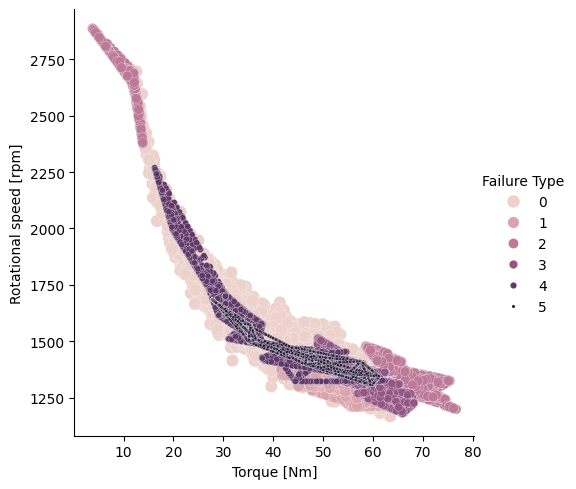

In [27]:
# Getting relation between Torque [Nm] and Rotational speed [rpm]
_ = sns.relplot(x="Torque [Nm]",
                y="Rotational speed [rpm]",
                hue="Failure Type",
                size="Failure Type",
                sizes=(80, 5),
                data=df_SMOT)

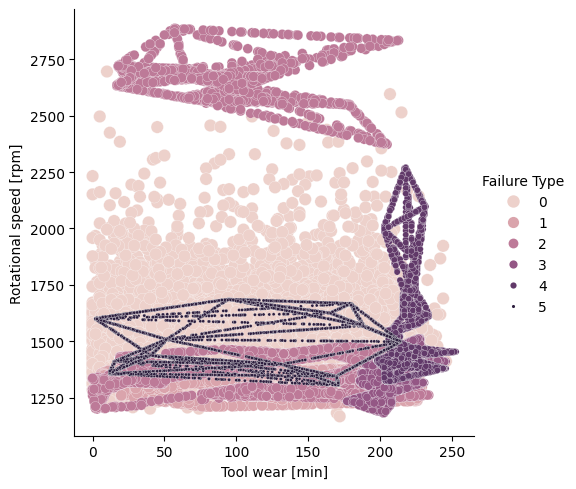

In [28]:
# Getting relation between Tool wear [min] and Rotational speed [rpm]
_ = sns.relplot(x="Tool wear [min]",
                y="Rotational speed [rpm]",
                hue="Failure Type",
                size="Failure Type",
                sizes=(80, 5),
                data=df_SMOT)

# Preprocessing

In [29]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, StandardScaler

In [30]:
# Build categorical preprocessor
categorical_cols = X.select_dtypes(include="object").columns.to_list() # Identifying Categorical Columns

categorical_pipe = make_pipeline(OneHotEncoder(sparse=False, handle_unknown="ignore")) # Creating a Pipeline for Categorical Features
                                                                                       # sparse=False ensures that the output is a dense NumPy array instead of a sparse matrix


# Build numeric processor
to_log = ["Rotational speed [rpm]", "Tool wear [min]"] # Defining lists of column name to be transformed
to_scale = ["Air temperature [K]", "Process temperature [K]", "Torque [Nm]"]

numeric_pipe_1 = make_pipeline(PowerTransformer()) # Creating Pipelines for Numerical Feature
numeric_pipe_2 = make_pipeline(StandardScaler())


# Full processor
full = ColumnTransformer(
    transformers=[
        ("categorical", categorical_pipe, categorical_cols),
        ("power_transform", numeric_pipe_1, to_log),
        ("standardization", numeric_pipe_2, to_scale)])

# Train with Random Forest Classifier

In [31]:
from sklearn.multiclass import OutputCodeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = OutputCodeClassifier(RandomForestClassifier(),
                           code_size=6,
                           random_state=40)

In [33]:
# Pipeline for Random Forest
pipeline = Pipeline(
    steps=[("preprocess", full),
     ("base",rfc)])

In [34]:
# Fit the model
model_rfc = pipeline.fit(X1_res, y1_res)
y_pred_rfc = model_rfc.predict(X_test)

In [35]:
from sklearn.metrics import matthews_corrcoef, confusion_matrix, classification_report, accuracy_score

In [36]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2896
           1       0.39      0.59      0.47        34
           2       0.47      0.64      0.55        28
           3       0.66      0.83      0.73        23
           4       0.05      0.21      0.09        14
           5       0.00      0.00      0.00         5

    accuracy                           0.94      3000
   macro avg       0.43      0.54      0.47      3000
weighted avg       0.97      0.94      0.95      3000



In [37]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test,y_pred_rfc)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test,y_pred_rfc)))

Accuracy Score: 0.9400
Matthews correlation coefficient: 0.4186


# Train with LGBM Classifier

In [38]:
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [39]:
lgbm = OutputCodeClassifier(LGBMClassifier(),
                            code_size=6,
                            random_state=42)

In [40]:
# Pipeline for LGBM
pipeline_lgbm = Pipeline(
    steps=[
        ("preprocess", full),
        ("base",lgbm,),])

In [41]:
# Fit the model
model_lgbm = pipeline_lgbm.fit(X1_res, y1_res)
y_pred_lgbm = model_lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 13480, number of negative: 26996
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 40476, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333037 -> initscore=-0.694482
[LightGBM] [Info] Start training from score -0.694482
[LightGBM] [Info] Number of positive: 33721, number of negative: 6755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 40476, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.833111 -> initscore=1.607838
[LightGBM] [Info] Start training from score 1.607838
[LightGBM] [Info]

In [42]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      2896
           1       0.77      0.97      0.86        34
           2       0.81      0.89      0.85        28
           3       0.66      0.83      0.73        23
           4       0.05      0.29      0.09        14
           5       0.00      0.00      0.00         5

    accuracy                           0.93      3000
   macro avg       0.55      0.65      0.58      3000
weighted avg       0.98      0.93      0.96      3000



In [43]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test,y_pred_lgbm)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test,y_pred_lgbm)))

Accuracy Score: 0.9343
Matthews correlation coefficient: 0.4924


# Train with XGBoost Classifier

In [44]:
from xgboost import XGBClassifier

In [45]:
# Fit the model
xgb = OutputCodeClassifier(XGBClassifier(),
                           code_size=6,
                           random_state=42)

In [46]:
# Pipeline for XGB Classifier
pipeline_xgb = Pipeline(
    steps=[("preprocess", full),
     ("base",xgb)])

In [47]:
model_xgb = pipeline_xgb.fit(X1_res, y1_res)
y_pred_xgb = model_xgb.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2896
           1       0.79      0.97      0.87        34
           2       0.77      0.86      0.81        28
           3       0.72      0.78      0.75        23
           4       0.06      0.21      0.09        14
           5       0.00      0.00      0.00         5

    accuracy                           0.95      3000
   macro avg       0.55      0.63      0.58      3000
weighted avg       0.98      0.95      0.96      3000



In [49]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test,y_pred_xgb)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test,y_pred_xgb)))

Accuracy Score: 0.9517
Matthews correlation coefficient: 0.5395


# Train with CatBoost Classifier

In [52]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.1 MB/s eta 0:00:00


In [53]:
from catboost import CatBoostClassifier, Pool, cv

In [54]:
catb = OutputCodeClassifier(CatBoostClassifier(random_seed=42, # ensures reproducibility
                                               logging_level='Silent'), # suppresses output during training
                            code_size=6, # number of columns in the output code matrix for each instance
                            random_state=42) # sets a random seed for reproducibility

In [55]:
# Pipeline for CatBoost
pipeline_catb = Pipeline(
    steps=[("preprocess", full),
     ("base",catb)])

In [56]:
model_catb = catb.fit(X1_res, y1_res)
y_pred_catb = model_catb.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred_catb))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2896
           1       0.81      1.00      0.89        34
           2       0.83      0.86      0.84        28
           3       0.73      0.83      0.78        23
           4       0.07      0.29      0.11        14
           5       0.00      0.00      0.00         5

    accuracy                           0.95      3000
   macro avg       0.57      0.65      0.60      3000
weighted avg       0.98      0.95      0.97      3000



In [58]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test,y_pred_catb)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test,y_pred_catb)))

Accuracy Score: 0.9507
Matthews correlation coefficient: 0.5461


**XGBoost is giving best accuracy. Implementing One vs Rest and One vs One Classifier strategy in this alogorithm**

# Train with One vs One Classifier

In [59]:
from sklearn.multiclass import OneVsOneClassifier

In [60]:
xgb_ovo = XGBClassifier()
ovo = OneVsOneClassifier(xgb_ovo)

In [61]:
# Fit the model
ovo.fit(X1_res, y1_res)
pre_ovo = ovo.predict(X_test)

In [62]:
print(classification_report(y_test, pre_ovo))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2896
           1       0.86      0.94      0.90        34
           2       0.74      0.82      0.78        28
           3       0.70      0.83      0.76        23
           4       0.06      0.21      0.09        14
           5       0.00      0.00      0.00         5

    accuracy                           0.95      3000
   macro avg       0.56      0.63      0.58      3000
weighted avg       0.98      0.95      0.96      3000



In [63]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test, pre_ovo)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test, pre_ovo)))

Accuracy Score: 0.9510
Matthews correlation coefficient: 0.5347


# Train with One vs Rest Classifier

In [64]:
from sklearn.multiclass import OneVsRestClassifier

In [65]:
xgb_ovr = XGBClassifier()
ovr = OneVsOneClassifier(xgb_ovr)

In [66]:
# Fit the model
ovr.fit(X1_res, y1_res)
pre_ovr = ovr.predict(X_test)

In [67]:
print(classification_report(y_test, pre_ovr))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2896
           1       0.86      0.94      0.90        34
           2       0.74      0.82      0.78        28
           3       0.70      0.83      0.76        23
           4       0.06      0.21      0.09        14
           5       0.00      0.00      0.00         5

    accuracy                           0.95      3000
   macro avg       0.56      0.63      0.58      3000
weighted avg       0.98      0.95      0.96      3000



In [68]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test, pre_ovr)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test, pre_ovr)))

Accuracy Score: 0.9510
Matthews correlation coefficient: 0.5347


# Implementing all Classification Metrices on XGBoost Classifier

In [69]:
from sklearn.metrics import matthews_corrcoef, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

## Classification Report

In [70]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2896
           1       0.79      0.97      0.87        34
           2       0.77      0.86      0.81        28
           3       0.72      0.78      0.75        23
           4       0.06      0.21      0.09        14
           5       0.00      0.00      0.00         5

    accuracy                           0.95      3000
   macro avg       0.55      0.63      0.58      3000
weighted avg       0.98      0.95      0.96      3000



## Accuracy

In [71]:
print(accuracy_score(y_test, y_pred_xgb))

0.9516666666666667


## Confusion Matrix

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay

In [73]:
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

[[2777    7    7    7   48   50]
 [   1   33    0    0    0    0]
 [   4    0   24    0    0    0]
 [   2    2    0   18    1    0]
 [  11    0    0    0    3    0]
 [   5    0    0    0    0    0]]


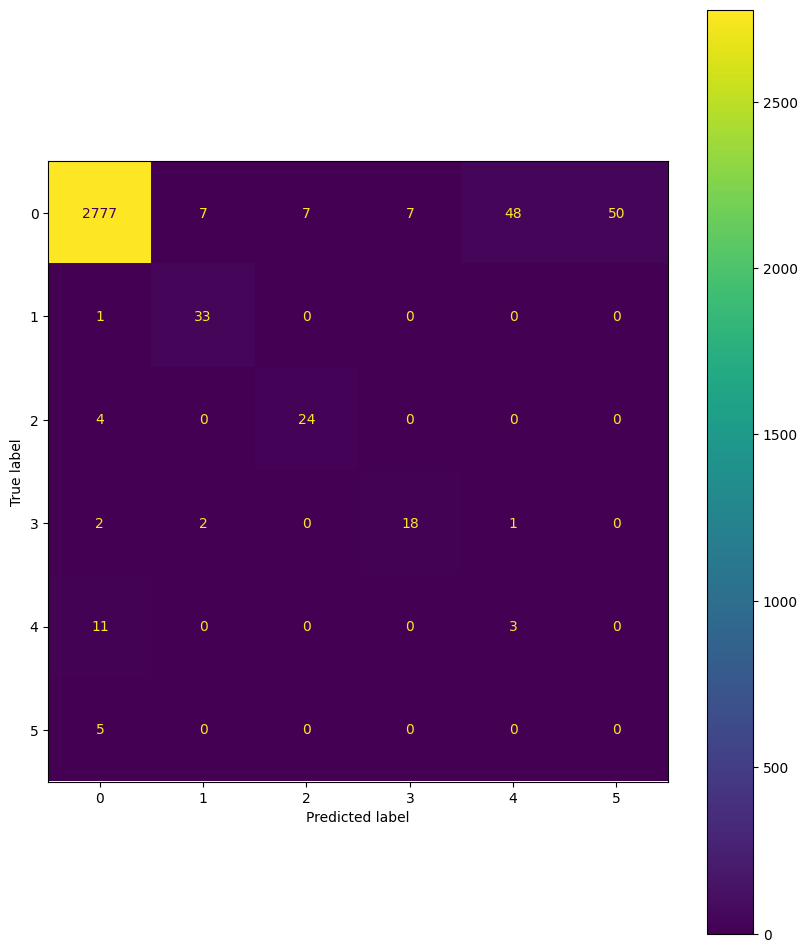

In [74]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 12))

cmp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show()

## Precision Score / Recall Score / F1 Score / AUC-ROC

In [75]:
# These are not for multi-class classification. Only for Binary Classification

#print(precision_score(y_test, y_pred_xgb))